In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import anderson
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , KFold , cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest , chi2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , confusion_matrix , f1_score , recall_score,roc_curve

# LOAD DATASET

In [103]:
data = pd.read_csv('loan_data_set.csv')
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# EDA

In [104]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [106]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [107]:
#Check for missing data
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [108]:
#replace missing value with mean and mode
data['Gender'] = data['Gender'].fillna(data['Gender'].mode().values[0])
data['Married'] = data['Married'].fillna(data['Married'].mode().values[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode().values[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode().values[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mean())

In [109]:
#Checking for missing value against after replace
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [110]:
data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [111]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [112]:
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [113]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# LABEL ENCODING


In [114]:
label_encoder = LabelEncoder()
data['Loan_ID'] = label_encoder.fit_transform(data['Loan_ID'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Married'] = label_encoder.fit_transform(data['Married'])
data['Dependents'] = label_encoder.fit_transform(data['Dependents'])
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Self_Employed'] = label_encoder.fit_transform(data['Self_Employed'])
data['Property_Area'] = label_encoder.fit_transform(data['Property_Area'])
data['Loan_Status'] = label_encoder.fit_transform(data['Loan_Status'])

In [115]:
data.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

# DATA VISUALIZATION

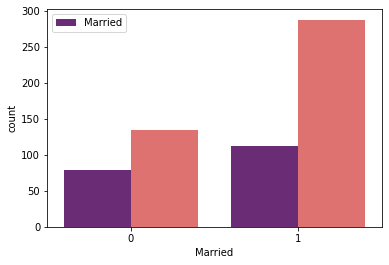

In [147]:
sns.countplot(x=data['Married'] ,hue=data['Loan_Status'] ,  data=data , palette='magma')
plt.legend(['Married'])
plt.show()

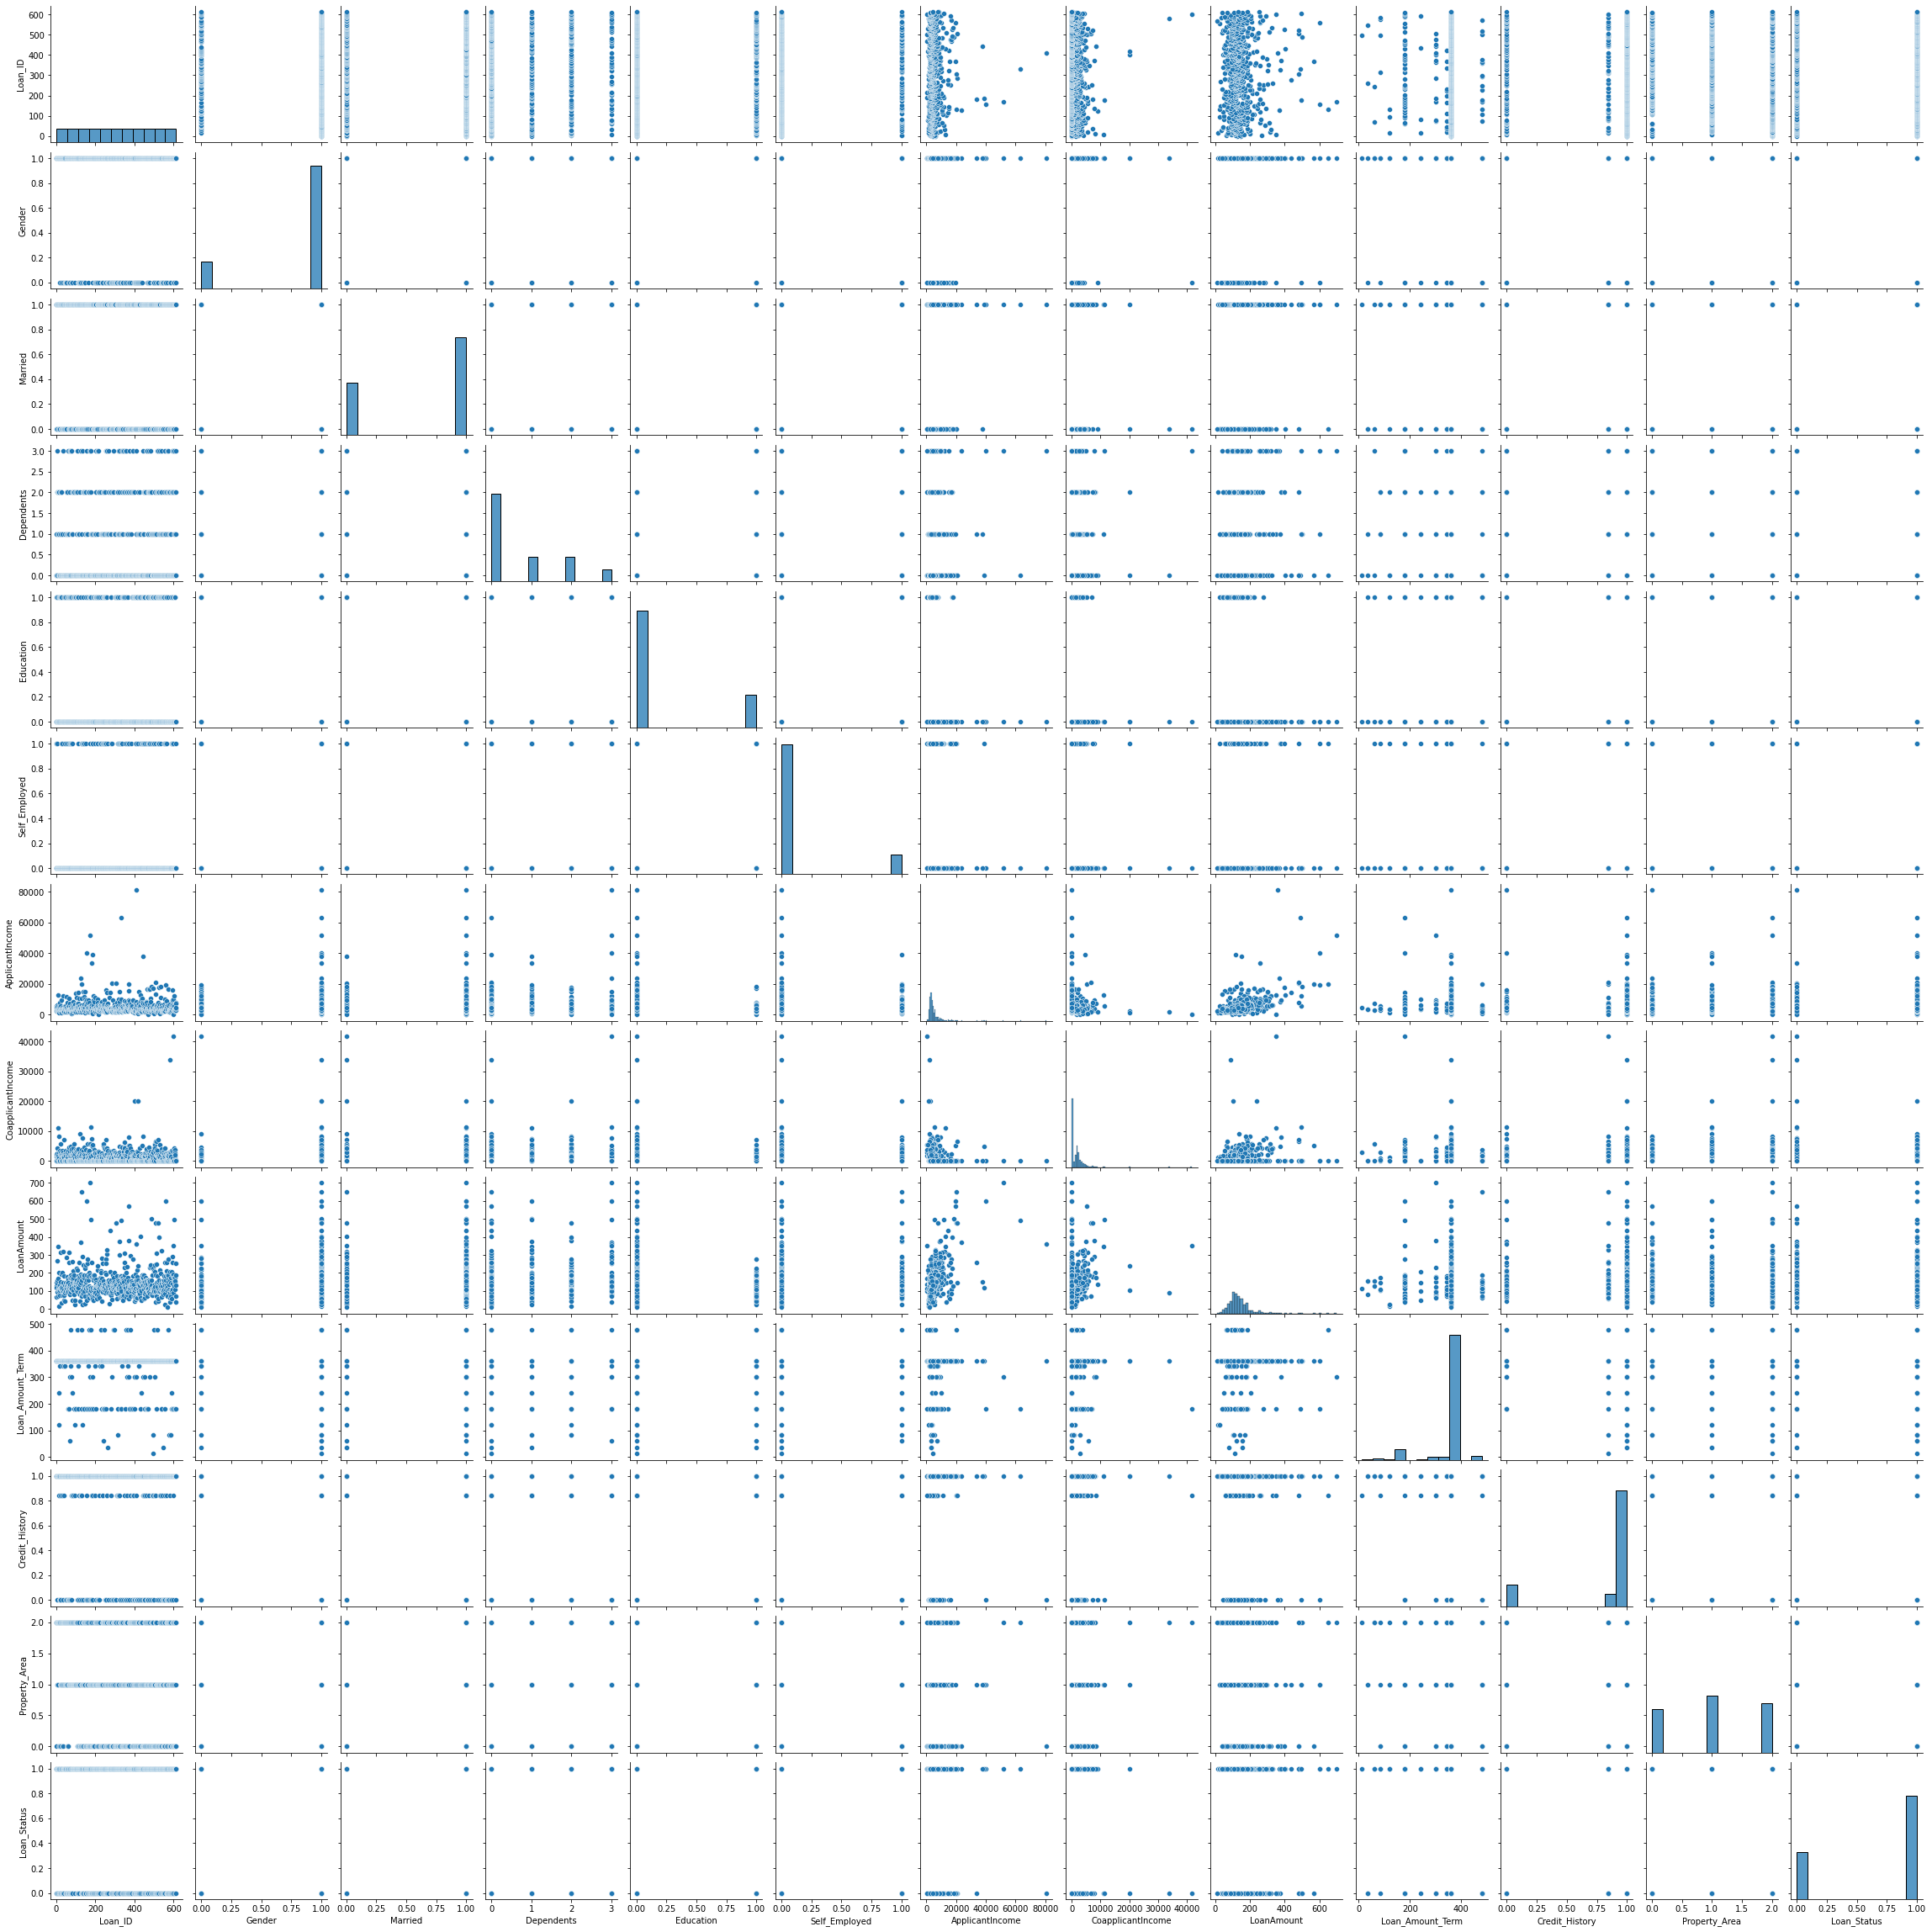

In [152]:
sns.pairplot(data)
plt.show()

# Descriptive statistics

                    Loan_ID    Gender   Married  Dependents  Education  \
Loan_ID            1.000000 -0.028029 -0.016013    0.051559   0.039442   
Gender            -0.028029  1.000000  0.364569    0.172914   0.045364   
Married           -0.016013  0.364569  1.000000    0.334216   0.012304   
Dependents         0.051559  0.172914  0.334216    1.000000   0.055752   
Education          0.039442  0.045364  0.012304    0.055752   1.000000   
Self_Employed      0.032874 -0.000525  0.004489    0.056798  -0.010383   
ApplicantIncome    0.016925  0.058809  0.051708    0.118202  -0.140760   
CoapplicantIncome  0.039211  0.082912  0.075948    0.030430  -0.062290   
LoanAmount         0.035684  0.107930  0.147141    0.163106  -0.166998   
Loan_Amount_Term  -0.028945 -0.073567 -0.100863   -0.101054  -0.077242   
Credit_History    -0.032429  0.012819  0.005852   -0.037392  -0.077936   
Property_Area     -0.155416 -0.025752  0.004257   -0.000244  -0.065243   
Loan_Status        0.011773  0.017987 

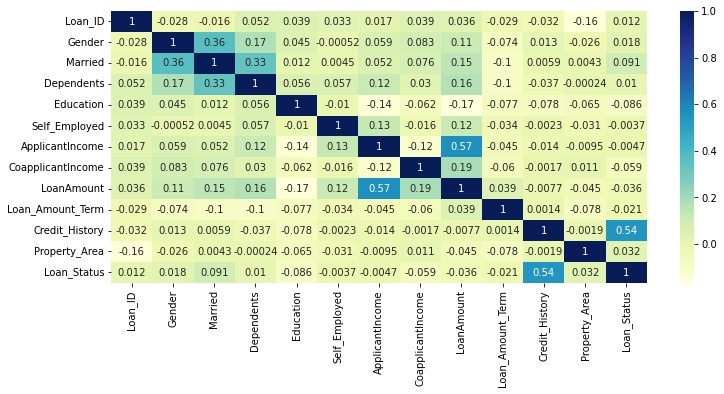

In [116]:
corr_mat = data.corr(method='pearson')
print(corr_mat)
plt.figure(figsize=(12,5))
sns.heatmap(corr_mat, cmap='YlGnBu', annot=True)
plt.show()

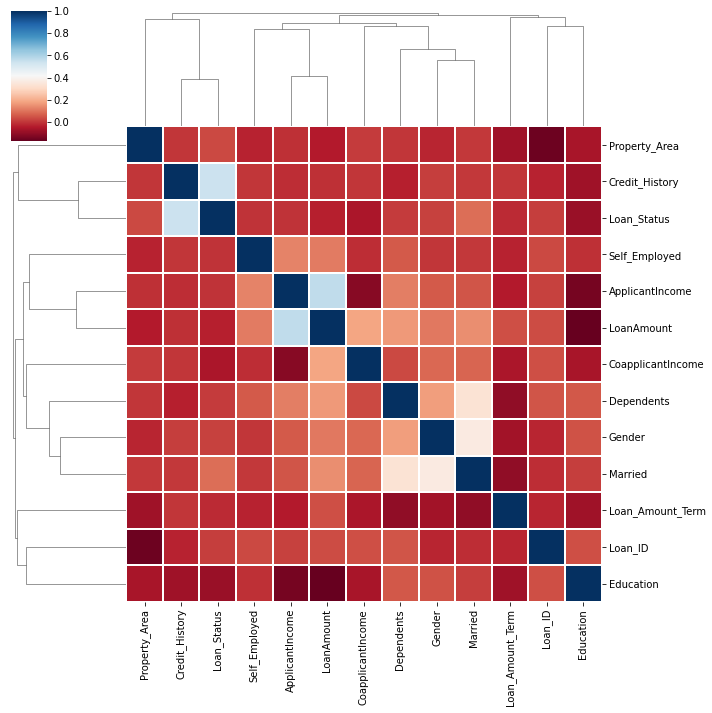

In [156]:
cg= sns.clustermap(corr_mat, cmap='RdBu',linewidth=0.1)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

# Feature Selection 


In [117]:
X = data.iloc[:, 0:12]
y = data.iloc[:,-1]
bestFeatures = SelectKBest(score_func=chi2 , k=10)
fit = bestFeatures.fit(X,y)
dfscore= pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScore = pd.concat([dfscore,dfcolumns], axis=1)
featureScore.columns = ['specs' , 'score']
print(featureScore)
print(featureScore.sort_values(['specs','score'],axis=0,ascending=True , inplace=True))

           specs              score
0       8.723627            Loan_ID
1       0.036234             Gender
2       1.782425            Married
3       0.085953         Dependents
4       3.540502          Education
5       0.007285      Self_Employed
6      93.904964    ApplicantIncome
7   11342.041603  CoapplicantIncome
8      39.211545         LoanAmount
9       3.267315   Loan_Amount_Term
10     25.998867     Credit_History
11      0.377837      Property_Area
None


In [118]:
X= data.drop(['Gender','Dependents','Self_Employed'],axis=1)

# TRAINING


In [119]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [120]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [121]:
knn = KNeighborsClassifier(n_neighbors=7, metric='minkowski')

In [122]:
knn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=7)

In [123]:
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0])

In [124]:
confusion_matrix(y_pred, y_test)

array([[ 57,   1],
       [  4, 123]], dtype=int64)

In [125]:
accuracy_score(y_pred,y_test)

0.972972972972973

In [130]:
print("=======================================")
print(f" f1 score is  {f1_score(y_pred , y_test)}")
print("=======================================")

0.9800796812749005


In [132]:
print("=======================================")
print(f" recall score is  {recall_score(y_pred , y_test)}")
print("=======================================")

 recall score is  0.968503937007874


In [133]:
print("=======================================")
print(f" roc curve score is  {roc_curve(y_pred , y_test)}")
print("=======================================")

 roc curve score is  (array([0.        , 0.01724138, 1.        ]), array([0.        , 0.96850394, 1.        ]), array([2, 1, 0]))
